In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

In [2]:
# make sure pandas is version 1.0 or higher
# make sure networkx is verion 2.4 or higher
print(pd.__version__)
print(nx.__version__)

2.2.3
3.4.2


In [3]:
from ema_workbench import (
    Model,
    Policy,
    ema_logging,
    SequentialEvaluator,
    MultiprocessingEvaluator,
)
from dike_model_function import DikeNetwork  # @UnresolvedImport
from problem_formulation2 import get_model_for_problem_formulation, sum_over, sum_over_time

In [4]:
ema_logging.log_to_stderr(ema_logging.INFO)

# choose problem formulation number, between 0-5
# each problem formulation has its own list of outcomes
dike_model, planning_steps = get_model_for_problem_formulation(1)

In [5]:
# enlisting uncertainties, their types (RealParameter/IntegerParameter/CategoricalParameter), lower boundary, and upper boundary
import copy

for unc in dike_model.uncertainties:
    print(repr(unc))

uncertainties = copy.deepcopy(dike_model.uncertainties)

CategoricalParameter('discount rate 0', [0, 1, 2, 3])
CategoricalParameter('discount rate 1', [0, 1, 2, 3])
CategoricalParameter('discount rate 2', [0, 1, 2, 3])
IntegerParameter('A.0_ID flood wave shape', 0, 132, resolution=None, default=None, variable_name=['A.0_ID flood wave shape'], pff=False)
RealParameter('A.1_Bmax', 30, 350, resolution=None, default=None, variable_name=['A.1_Bmax'], pff=False)
RealParameter('A.1_pfail', 0, 1, resolution=None, default=None, variable_name=['A.1_pfail'], pff=False)
CategoricalParameter('A.1_Brate', [0, 1, 2])
RealParameter('A.2_Bmax', 30, 350, resolution=None, default=None, variable_name=['A.2_Bmax'], pff=False)
RealParameter('A.2_pfail', 0, 1, resolution=None, default=None, variable_name=['A.2_pfail'], pff=False)
CategoricalParameter('A.2_Brate', [0, 1, 2])
RealParameter('A.3_Bmax', 30, 350, resolution=None, default=None, variable_name=['A.3_Bmax'], pff=False)
RealParameter('A.3_pfail', 0, 1, resolution=None, default=None, variable_name=['A.3_pfai

In [6]:
# enlisting policy levers, their types (RealParameter/IntegerParameter), lower boundary, and upper boundary
for policy in dike_model.levers:
    print(repr(policy))

levers = copy.deepcopy(dike_model.levers)

IntegerParameter('0_RfR 0', 0, 1, resolution=None, default=None, variable_name=['0_RfR 0'], pff=False)
IntegerParameter('0_RfR 1', 0, 1, resolution=None, default=None, variable_name=['0_RfR 1'], pff=False)
IntegerParameter('0_RfR 2', 0, 1, resolution=None, default=None, variable_name=['0_RfR 2'], pff=False)
IntegerParameter('1_RfR 0', 0, 1, resolution=None, default=None, variable_name=['1_RfR 0'], pff=False)
IntegerParameter('1_RfR 1', 0, 1, resolution=None, default=None, variable_name=['1_RfR 1'], pff=False)
IntegerParameter('1_RfR 2', 0, 1, resolution=None, default=None, variable_name=['1_RfR 2'], pff=False)
IntegerParameter('2_RfR 0', 0, 1, resolution=None, default=None, variable_name=['2_RfR 0'], pff=False)
IntegerParameter('2_RfR 1', 0, 1, resolution=None, default=None, variable_name=['2_RfR 1'], pff=False)
IntegerParameter('2_RfR 2', 0, 1, resolution=None, default=None, variable_name=['2_RfR 2'], pff=False)
IntegerParameter('3_RfR 0', 0, 1, resolution=None, default=None, variable

In [7]:
# enlisting outcomes
for outcome in dike_model.outcomes:
    print(repr(outc
    ome))

ScalarOutcome('Expected Annual Damage', variable_name=('A.1_Expected Annual Damage', 'A.2_Expected Annual Damage', 'A.3_Expected Annual Damage', 'A.4_Expected Annual Damage', 'A.5_Expected Annual Damage'), function=<function sum_over at 0x122603ec0>)
ScalarOutcome('RfR Total Costs', variable_name=('RfR Total Costs',), function=<function sum_over at 0x122603ec0>)
ScalarOutcome('Dike Investment Costs', variable_name=('RfR Total Costs',), function=<function sum_over at 0x122603ec0>)


In [40]:
# running the model through EMA workbench
with (MultiprocessingEvaluator(dike_model) as evaluator):
    results= evaluator.perform_experiments(scenarios=100, policies=275)

[MainProcess/INFO] pool started with 8 workers
[MainProcess/INFO] performing 100 scenarios * 275 policies * 1 model(s) = 27500 experiments
100%|████████████████████████████████████| 27500/27500 [20:04<00:00, 22.83it/s]
[MainProcess/INFO] experiments finished
[MainProcess/INFO] terminating pool


In [41]:
# observing the simulation runs
experiments, outcomes = results
print(outcomes.keys())
experiments

dict_keys(['Expected Annual Damage', 'RfR Total Costs', 'Dike Investment Costs'])


,A.0_ID flood wave shape,A.1_Bmax,A.1_Brate,A.1_pfail,A.2_Bmax,A.2_Brate,A.2_pfail,A.3_Bmax,A.3_Brate,A.3_pfail,...,A.4_DikeIncrease 0,A.4_DikeIncrease 1,A.4_DikeIncrease 2,A.5_DikeIncrease 0,A.5_DikeIncrease 1,A.5_DikeIncrease 2,EWS_DaysToThreat,scenario,policy,model
0,74,227.079495,1.0,0.243115,310.816495,10.0,0.487944,124.681362,1.0,0.560655,...,0,5,10,9,8,4,1,850,575,dikesnet
1,108,183.648476,10.0,0.507028,82.183207,1.5,0.692627,68.336103,1.5,0.850079,...,0,5,10,9,8,4,1,851,575,dikesnet
2,57,55.654856,1.0,0.713550,102.918009,1.0,0.198368,148.323653,1.5,0.239488,...,0,5,10,9,8,4,1,852,575,dikesnet
3,85,177.732850,1.0,0.395442,194.486214,1.5,0.767056,135.681619,1.5,0.295045,...,0,5,10,9,8,4,1,853,575,dikesnet
4,63,321.122464,1.5,0.274794,91.914410,10.0,0.658221,318.827680,1.0,0.963210,...,0,5,10,9,8,4,1,854,575,dikesnet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27495,3,103.317720,1.0,0.112303,217.312878,10.0,0.981048,179.376893,10.0,0.287857,...,8,7,10,3,5,2,0,945,849,dikesnet
27496,78,158.582411,1.0,0.132867,71.340228,1.0,0.232394,214.446094,10.0,0.213849,...,8,7,10,3,5,2,0,946,849,dikesnet
27497,59,123.848351,1.0,0.477336,289.208069,1.5,0.117282,339.345738,1.5,0.762375,...,8,7,10,3,5,2,0,947,849,dikesnet
27498,51,43.743859,1.5,0.077539,313.273396,1.5,0.371787,112.296792,10.0,0.649392,...,8,7,10,3,5,2,0,948,849,dikesnet


In [42]:
experiments.columns

Index(['A.0_ID flood wave shape', 'A.1_Bmax', 'A.1_Brate', 'A.1_pfail',
       'A.2_Bmax', 'A.2_Brate', 'A.2_pfail', 'A.3_Bmax', 'A.3_Brate',
       'A.3_pfail', 'A.4_Bmax', 'A.4_Brate', 'A.4_pfail', 'A.5_Bmax',
       'A.5_Brate', 'A.5_pfail', 'discount rate 0', 'discount rate 1',
       'discount rate 2', '0_RfR 0', '0_RfR 1', '0_RfR 2', '1_RfR 0',
       '1_RfR 1', '1_RfR 2', '2_RfR 0', '2_RfR 1', '2_RfR 2', '3_RfR 0',
       '3_RfR 1', '3_RfR 2', '4_RfR 0', '4_RfR 1', '4_RfR 2',
       'A.1_DikeIncrease 0', 'A.1_DikeIncrease 1', 'A.1_DikeIncrease 2',
       'A.2_DikeIncrease 0', 'A.2_DikeIncrease 1', 'A.2_DikeIncrease 2',
       'A.3_DikeIncrease 0', 'A.3_DikeIncrease 1', 'A.3_DikeIncrease 2',
       'A.4_DikeIncrease 0', 'A.4_DikeIncrease 1', 'A.4_DikeIncrease 2',
       'A.5_DikeIncrease 0', 'A.5_DikeIncrease 1', 'A.5_DikeIncrease 2',
       'EWS_DaysToThreat', 'scenario', 'policy', 'model'],
      dtype='object')

In [43]:
# only works because we have scalar outcomes
outcomes_pd = pd.DataFrame(outcomes)
outcomes_pd

,Expected Annual Damage,RfR Total Costs,Dike Investment Costs
0,1.067435e+07,1.488100e+09,1.488100e+09
1,9.884854e+05,1.488100e+09,1.488100e+09
2,0.000000e+00,1.488100e+09,1.488100e+09
3,1.208226e+07,1.488100e+09,1.488100e+09
4,9.211713e+05,1.488100e+09,1.488100e+09
...,...,...,...
27495,1.918705e+07,9.545000e+08,9.545000e+08
27496,0.000000e+00,9.545000e+08,9.545000e+08
27497,5.093693e+06,9.545000e+08,9.545000e+08
27498,0.000000e+00,9.545000e+08,9.545000e+08


In [44]:
tot = experiments.join(outcomes_pd)
tot


,A.0_ID flood wave shape,A.1_Bmax,A.1_Brate,A.1_pfail,A.2_Bmax,A.2_Brate,A.2_pfail,A.3_Bmax,A.3_Brate,A.3_pfail,...,A.5_DikeIncrease 0,A.5_DikeIncrease 1,A.5_DikeIncrease 2,EWS_DaysToThreat,scenario,policy,model,Expected Annual Damage,RfR Total Costs,Dike Investment Costs
0,74,227.079495,1.0,0.243115,310.816495,10.0,0.487944,124.681362,1.0,0.560655,...,9,8,4,1,850,575,dikesnet,1.067435e+07,1.488100e+09,1.488100e+09
1,108,183.648476,10.0,0.507028,82.183207,1.5,0.692627,68.336103,1.5,0.850079,...,9,8,4,1,851,575,dikesnet,9.884854e+05,1.488100e+09,1.488100e+09
2,57,55.654856,1.0,0.713550,102.918009,1.0,0.198368,148.323653,1.5,0.239488,...,9,8,4,1,852,575,dikesnet,0.000000e+00,1.488100e+09,1.488100e+09
3,85,177.732850,1.0,0.395442,194.486214,1.5,0.767056,135.681619,1.5,0.295045,...,9,8,4,1,853,575,dikesnet,1.208226e+07,1.488100e+09,1.488100e+09
4,63,321.122464,1.5,0.274794,91.914410,10.0,0.658221,318.827680,1.0,0.963210,...,9,8,4,1,854,575,dikesnet,9.211713e+05,1.488100e+09,1.488100e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27495,3,103.317720,1.0,0.112303,217.312878,10.0,0.981048,179.376893,10.0,0.287857,...,3,5,2,0,945,849,dikesnet,1.918705e+07,9.545000e+08,9.545000e+08
27496,78,158.582411,1.0,0.132867,71.340228,1.0,0.232394,214.446094,10.0,0.213849,...,3,5,2,0,946,849,dikesnet,0.000000e+00,9.545000e+08,9.545000e+08
27497,59,123.848351,1.0,0.477336,289.208069,1.5,0.117282,339.345738,1.5,0.762375,...,3,5,2,0,947,849,dikesnet,5.093693e+06,9.545000e+08,9.545000e+08
27498,51,43.743859,1.5,0.077539,313.273396,1.5,0.371787,112.296792,10.0,0.649392,...,3,5,2,0,948,849,dikesnet,0.000000e+00,9.545000e+08,9.545000e+08


[MainProcess/INFO] no time dimension found in results


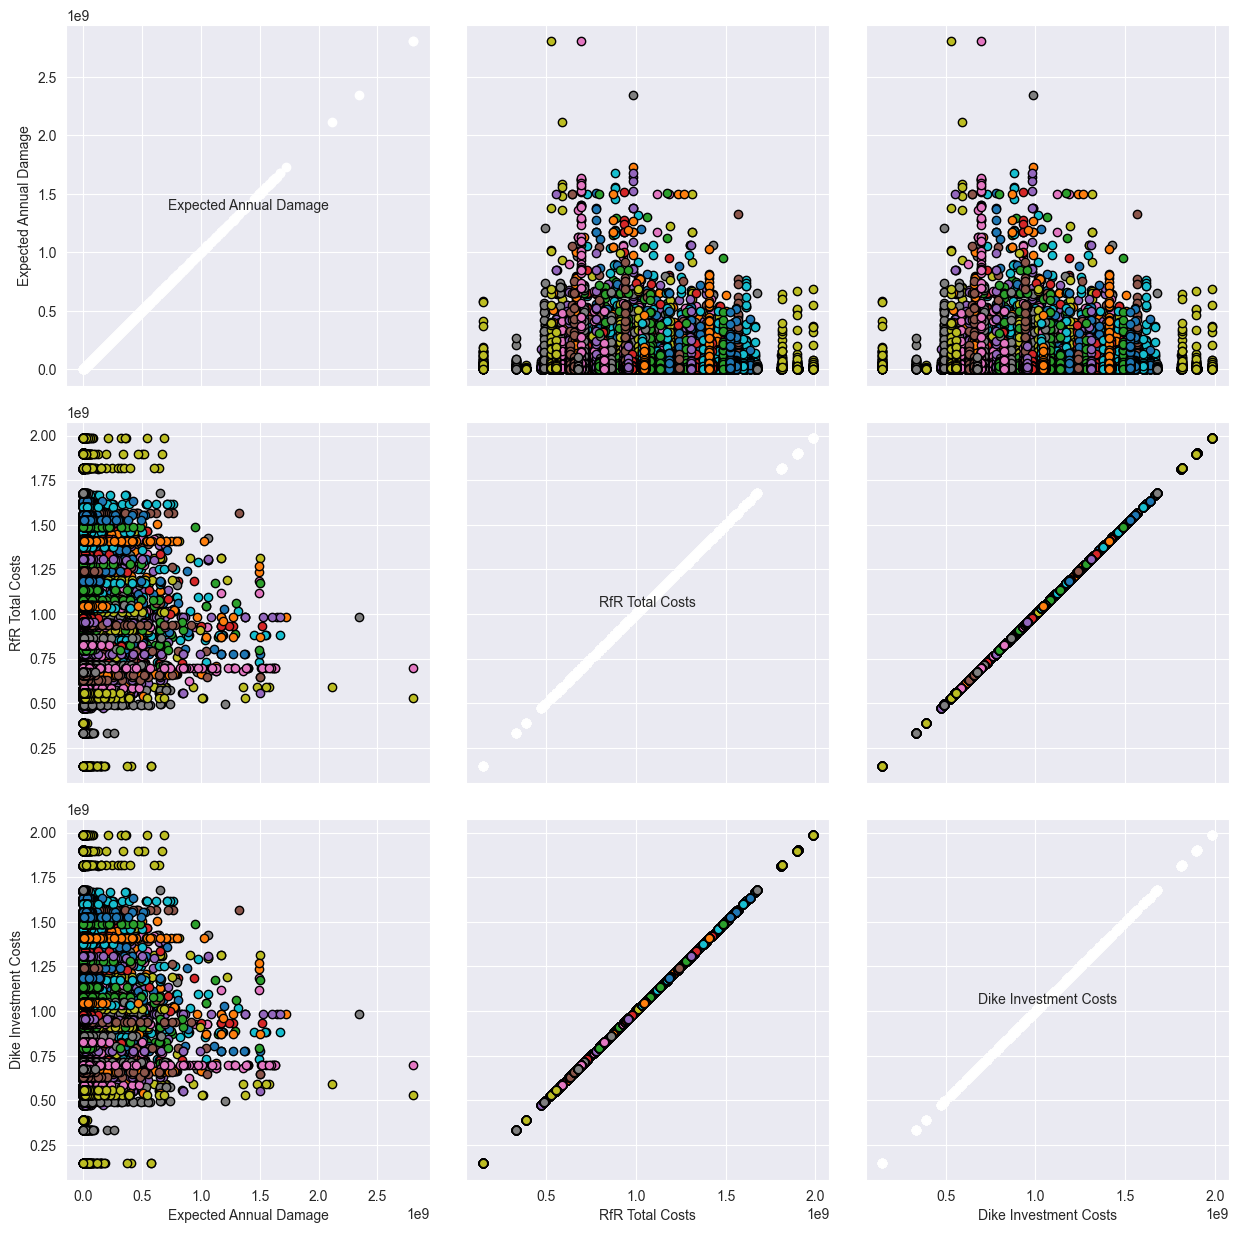

In [45]:
from ema_workbench.analysis import pairs_plotting

fig, axes = pairs_plotting.pairs_scatter(tot, outcomes, group_by='policy',legend=False)
fig.set_figheight(15)
fig.set_figwidth(15)
plt.show()

In [46]:
tot_policy = tot.groupby('policy').mean(numeric_only=True)
tot_policy.sort_values(by=tot_policy.columns[-1], ascending=True, inplace=True)
tot_policy

/var/folders/cq/_rbxzkq17533m5qdt1c__dyw0000gn/T/ipykernel_60331/255886294.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tot_policy = tot.groupby('policy').mean(numeric_only=True)


,A.0_ID flood wave shape,A.1_Bmax,A.1_pfail,A.2_Bmax,A.2_pfail,A.3_Bmax,A.3_pfail,A.4_Bmax,A.4_pfail,A.5_Bmax,...,A.4_DikeIncrease 0,A.4_DikeIncrease 1,A.4_DikeIncrease 2,A.5_DikeIncrease 0,A.5_DikeIncrease 1,A.5_DikeIncrease 2,EWS_DaysToThreat,Expected Annual Damage,RfR Total Costs,Dike Investment Costs
policy,,,,,,,,,,,,,,,,,,,,,
633,66.07,190.132097,0.49992,190.060852,0.50023,190.008956,0.50035,190.150206,0.5001,189.997215,...,7.0,2.0,1.0,2.0,9.0,5.0,1.0,5.975312e+07,1.460000e+08,1.460000e+08
682,66.07,190.132097,0.49992,190.060852,0.50023,190.008956,0.50035,190.150206,0.5001,189.997215,...,1.0,6.0,7.0,10.0,9.0,7.0,0.0,2.172947e+07,3.331000e+08,3.331000e+08
583,66.07,190.132097,0.49992,190.060852,0.50023,190.008956,0.50035,190.150206,0.5001,189.997215,...,5.0,1.0,3.0,8.0,10.0,1.0,4.0,1.041776e+06,3.884000e+08,3.884000e+08
729,66.07,190.132097,0.49992,190.060852,0.50023,190.008956,0.50035,190.150206,0.5001,189.997215,...,1.0,4.0,1.0,3.0,9.0,6.0,1.0,9.906336e+06,4.730000e+08,4.730000e+08
802,66.07,190.132097,0.49992,190.060852,0.50023,190.008956,0.50035,190.150206,0.5001,189.997215,...,2.0,1.0,2.0,0.0,4.0,3.0,1.0,7.227865e+07,4.909000e+08,4.909000e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
618,66.07,190.132097,0.49992,190.060852,0.50023,190.008956,0.50035,190.150206,0.5001,189.997215,...,7.0,10.0,6.0,5.0,3.0,1.0,2.0,3.330613e+06,1.810100e+09,1.810100e+09
843,66.07,190.132097,0.49992,190.060852,0.50023,190.008956,0.50035,190.150206,0.5001,189.997215,...,4.0,9.0,0.0,1.0,10.0,10.0,0.0,5.344600e+07,1.816000e+09,1.816000e+09
763,66.07,190.132097,0.49992,190.060852,0.50023,190.008956,0.50035,190.150206,0.5001,189.997215,...,0.0,0.0,3.0,10.0,0.0,1.0,0.0,4.354242e+07,1.894700e+09,1.894700e+09


In [47]:
# code blok mean/max/min
# Zet de outcomes om naar een dataframe
outcomes_df = pd.DataFrame.from_dict(outcomes)

# Selecteer de juiste kolommen (kosten en schade)
columns = ["RfR Total Costs", "Expected Annual Damage"]

# Bereken mean, max, min
summary = outcomes_df[columns].agg(['mean', 'max', 'min'])

# Zet kosten om naar miljoenen euro (zoals in voorbeeldtabel)
summary.loc[:, "RfR Total Costs"] = summary["RfR Total Costs"] / 1e6
summary.loc[:, "Expected Annual Damage"] = summary["Expected Annual Damage"] / 1e6

# Rond af op 2 decimalen
summary = summary.round(2)

# Herbenoem de rijen voor helderheid
summary.index = ['Mean', 'Maximum', 'Minimum']
summary

,RfR Total Costs,Expected Annual Damage
Mean,1066.63,44.79
Maximum,1985.20,2803.05
Minimum,146.00,0.00


In [48]:
summary

,RfR Total Costs,Expected Annual Damage
Mean,1066.63,44.79
Maximum,1985.20,2803.05
Minimum,146.00,0.00


In [49]:
# defining specific policies
# for example, policy 1 is about extra protection in upper boundary
# policy 2 is about extra protection in lower boundary
# policy 3 is extra protection in random locations


def get_do_nothing_dict():
    return {l.name: 0 for l in dike_model.levers}


policies = [
    Policy(
        "policy 1",
        **dict(
            get_do_nothing_dict(),
            **{"0_RfR 0": 1, "0_RfR 1": 1, "0_RfR 2": 1, "A.1_DikeIncrease 0": 5}
        )
    ),
    Policy(
        "policy 2",
        **dict(
            get_do_nothing_dict(),
            **{"4_RfR 0": 1, "4_RfR 1": 1, "4_RfR 2": 1, "A.5_DikeIncrease 0": 5}
        )
    ),
    Policy(
        "policy 3",
        **dict(
            get_do_nothing_dict(),
            **{"1_RfR 0": 1, "2_RfR 1": 1, "3_RfR 2": 1, "A.3_DikeIncrease 0": 5}
        )
    ),
]

In [50]:
# pass the policies list to EMA workbench experiment runs
n_scenarios = 100
with MultiprocessingEvaluator(dike_model) as evaluator:
    results = evaluator.perform_experiments(n_scenarios, policies)

[MainProcess/INFO] pool started with 8 workers
[MainProcess/INFO] performing 100 scenarios * 3 policies * 1 model(s) = 300 experiments
100%|████████████████████████████████████████| 300/300 [00:10<00:00, 29.17it/s]
[MainProcess/INFO] experiments finished
[MainProcess/INFO] terminating pool


In [51]:
experiments, outcomes = results

In [52]:
# only works because we have scalar outcomes
pd.DataFrame(outcomes)

,Expected Annual Damage,RfR Total Costs,Dike Investment Costs
0,1.388511e+09,253800000.0,253800000.0
1,1.348780e+09,253800000.0,253800000.0
2,1.525389e+09,253800000.0,253800000.0
3,4.670373e+08,253800000.0,253800000.0
4,1.354933e+09,253800000.0,253800000.0
...,...,...,...
295,9.835644e+07,369700000.0,369700000.0
296,5.147636e+08,369700000.0,369700000.0
297,1.617771e+08,369700000.0,369700000.0
298,4.521074e+07,369700000.0,369700000.0


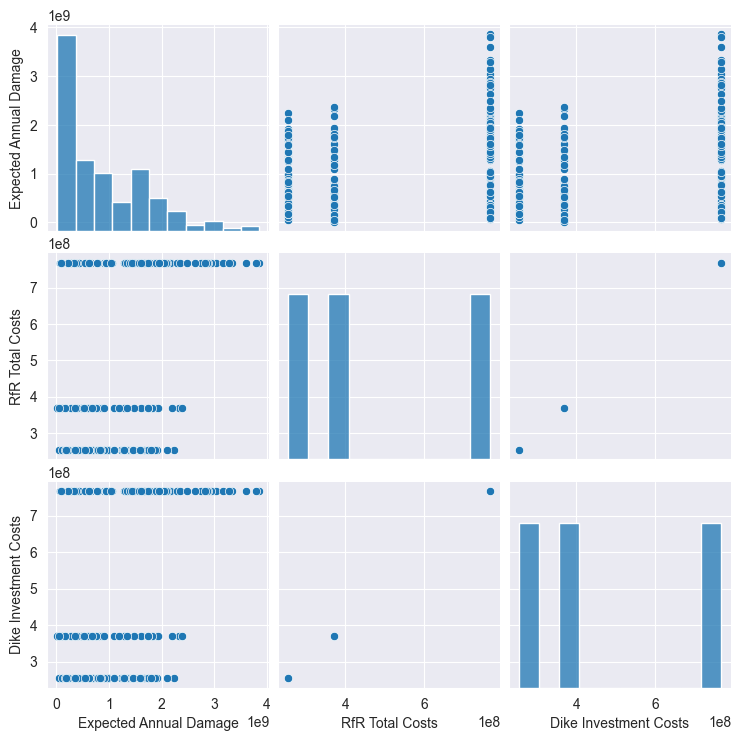

In [53]:
sns.pairplot(pd.DataFrame.from_dict(outcomes))
plt.show()

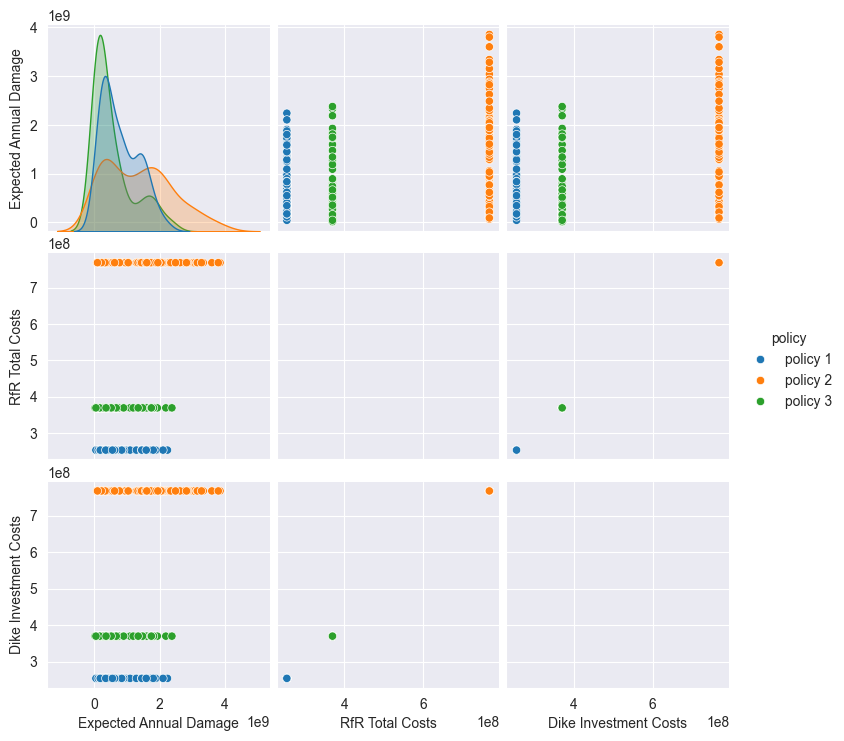

In [54]:
policies = experiments['policy']

data = pd.DataFrame.from_dict(outcomes)
data['policy'] = policies

sns.pairplot(data, hue='policy',  vars=outcomes.keys(), )
plt.show()

In [25]:
from ema_workbench import save_results

# Zorg ervoor dat 'results' bestaat in je notebook:
# results = perform_experiments(...)
# experiments, outcomes = results

save_results(results, 'dike_open_exploration_results.tar.gz')

[MainProcess/INFO] results saved successfully to /Users/evalievanoijen/PycharmProjects/group25_mbdm/final assignment/dike_open_exploration_results.tar.gz


In [56]:
from ema_workbench import load_results
import pandas as pd

# Laad resultaten
user_results = load_results("dike_open_exploration_results.tar.gz")
example_results = load_results("8000 scenarios 50 policies.tar.gz")

user_experiments, user_outcomes = user_results
example_experiments, example_outcomes = example_results

# Vergelijk vorm van de experimenten
print("User experiments shape:", user_experiments.shape)
print("Example experiments shape:", example_experiments.shape)

# Bekijk kolomnamen
print("\nUser experiment columns:")
print(user_experiments.columns.tolist())

print("\nExample experiment columns:")
print(example_experiments.columns.tolist())

# Bekijk welke outcomes aanwezig zijn
print("\nUser outcomes:")
print(user_outcomes.keys())

print("\nExample outcomes:")
print(example_outcomes.keys())


[MainProcess/INFO] results loaded successfully from /Users/evalievanoijen/PycharmProjects/group25_mbdm/final assignment/dike_open_exploration_results.tar.gz


FileNotFoundError: [Errno 2] No such file or directory: '/Users/evalievanoijen/PycharmProjects/group25_mbdm/final assignment/8000 scenarios 50 policies.tar.gz'